In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np

# Load layerwise profiling data
df = pd.read_csv("layerwise_results_densenet40.csv")

# -------------------------
# Latency Analytical Model
# -------------------------

# Prepare features
X_latency = df[["Operations", "Subarray", "DRAM_Accesses"]].copy()
X_latency["Ops/Subarray"] = X_latency["Operations"] / X_latency["Subarray"]
X_latency = X_latency[["Ops/Subarray", "DRAM_Accesses"]]
y_latency = df["Latency"]

# Split into train/test sets
X_lat_train, X_lat_test, y_lat_train, y_lat_test = train_test_split(X_latency, y_latency, test_size=0.2, random_state=42)

# Train model
latency_model = LinearRegression().fit(X_lat_train, y_lat_train)

# Predict on test set
latency_pred = latency_model.predict(X_lat_test)

# Print coefficients
print("=== Latency Model ===")
print("Latency = α * (Operations / Subarray) + β * DRAM_Accesses + γ")
print(f"α = {latency_model.coef_[0]:.6e}")
print(f"β = {latency_model.coef_[1]:.6e}")
print(f"γ = {latency_model.intercept_:.6e}")

# Evaluate
print("--- Latency Evaluation Metrics ---")
print(f"R²: {r2_score(y_lat_test, latency_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_lat_test, latency_pred):.6f}")
print(f"MSE: {mean_squared_error(y_lat_test, latency_pred):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_lat_test, latency_pred)):.6f}")
print(f"MAPE: {mean_absolute_percentage_error(y_lat_test, latency_pred):.4f}")

# -------------------------
# Energy Analytical Model
# -------------------------

# Prepare features
X_energy = df[["DRAM_Accesses", "ADC_to_GB", "Operations"]]
y_energy = df["Energy"]

# Split into train/test sets
X_eng_train, X_eng_test, y_eng_train, y_eng_test = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)

# Train model
energy_model = LinearRegression().fit(X_eng_train, y_eng_train)

# Predict on test set
energy_pred = energy_model.predict(X_eng_test)

# Print coefficients
print("\n=== Energy Model ===")
print("Energy = δ * DRAM_Accesses + ε * ADC_to_GB + ζ * Operations + η")
print(f"δ = {energy_model.coef_[0]:.6e}")
print(f"ε = {energy_model.coef_[1]:.6e}")
print(f"ζ = {energy_model.coef_[2]:.6e}")
print(f"η = {energy_model.intercept_:.6e}")

# Evaluate
print("--- Energy Evaluation Metrics ---")
print(f"R²: {r2_score(y_eng_test, energy_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_eng_test, energy_pred):.6f}")
print(f"MSE: {mean_squared_error(y_eng_test, energy_pred):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_eng_test, energy_pred)):.6f}")
print(f"MAPE: {mean_absolute_percentage_error(y_eng_test, energy_pred):.4f}")

# -------------------------
# Optional: Show example predictions
# -------------------------
print("\n=== Sample Predictions ===")
print("Latency predictions vs Actual:")
for pred, actual in zip(latency_pred[:5], y_lat_test[:5]):
    print(f"Predicted: {pred:.6f}, Actual: {actual:.6f}")

print("\nEnergy predictions vs Actual:")
for pred, actual in zip(energy_pred[:5], y_eng_test[:5]):
    print(f"Predicted: {pred:.6e}, Actual: {actual:.6e}")

=== Latency Model ===
Latency = α * (Operations / Subarray) + β * DRAM_Accesses + γ
α = 2.541534e-10
β = 2.808813e-11
γ = 7.199014e-06
--- Latency Evaluation Metrics ---
R²: 0.5741
MAE: 0.000004
MSE: 0.000000
RMSE: 0.000006
MAPE: 0.3687

=== Energy Model ===
Energy = δ * DRAM_Accesses + ε * ADC_to_GB + ζ * Operations + η
δ = -8.520942e-13
ε = 7.553363e-12
ζ = 5.332464e-13
η = -5.546708e-08
--- Energy Evaluation Metrics ---
R²: 0.9973
MAE: 0.000000
MSE: 0.000000
RMSE: 0.000000
MAPE: 290954401.2507

=== Sample Predictions ===
Latency predictions vs Actual:
Predicted: 0.000009, Actual: 0.000007
Predicted: 0.000037, Actual: 0.000033
Predicted: 0.000010, Actual: 0.000007
Predicted: 0.000018, Actual: 0.000037
Predicted: 0.000010, Actual: 0.000013

Energy predictions vs Actual:
Predicted: 1.504764e-06, Actual: 2.000000e-06
Predicted: 1.085497e-06, Actual: 2.000000e-06
Predicted: -1.807922e-08, Actual: 0.000000e+00
Predicted: 1.487860e-06, Actual: 2.000000e-06
Predicted: 2.966877e-07, Actual: 

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load layerwise profiling data
#df = pd.read_csv("layerwise_results_resnet18.csv", sep="\t")  # Use correct separator (tab, comma, etc.)
df = pd.read_csv("layerwise_results_resnet18.csv", sep=",")

print(df.columns.tolist())

# -------------------------
# Latency Analytical Model
# -------------------------

# Estimate Operations as sum of Mem_Reads + Mem_Writes + PE_to_PE (or adjust this as per your context)
df["Operations"] = df["Mem_Reads"] + df["Mem_Writes"] + df["PE_to_PE"]

# Prepare features for latency model
X_latency = df[["Operations", "Subarray", "DRAM_Accesses"]].copy()
X_latency["Ops/Subarray"] = X_latency["Operations"] / X_latency["Subarray"]
X_latency = X_latency[["Ops/Subarray", "DRAM_Accesses"]]
y_latency = df["Latency"]

# Train the latency model
latency_model = LinearRegression().fit(X_latency, y_latency)

print("=== Latency Model ===")
print("Latency = α * (Operations / Subarray) + β * DRAM_Accesses + γ")
print(f"α = {latency_model.coef_[0]:.6e}")
print(f"β = {latency_model.coef_[1]:.6e}")
print(f"γ = {latency_model.intercept_:.6e}")

# -------------------------
# Energy Analytical Model
# -------------------------
# Prepare features for energy model
X_energy = df[["DRAM_Accesses", "DRAM_to_GB", "Operations"]]
y_energy = df["Energy"]

# Train the energy model
energy_model = LinearRegression().fit(X_energy, y_energy)

print("\n=== Energy Model ===")
print("Energy = δ * DRAM_Accesses + ε * DRAM_to_GB + ζ * Operations + η")
print(f"δ = {energy_model.coef_[0]:.6e}")
print(f"ε = {energy_model.coef_[1]:.6e}")
print(f"ζ = {energy_model.coef_[2]:.6e}")
print(f"η = {energy_model.intercept_:.6e}")


['Model', 'TechNode', 'BatchSize', 'Subarray', 'MemCell', 'Dataflow', 'Layer', 'Latency', 'Energy', 'Mem_Reads', 'Mem_Writes', 'L1_Accesses', 'L2_Accesses', 'DRAM_Accesses', 'PE_to_PE', 'GB_to_PE', 'DRAM_to_GB']
=== Latency Model ===
Latency = α * (Operations / Subarray) + β * DRAM_Accesses + γ
α = 3.264070e-12
β = 9.511695e-13
γ = 3.069471e-06

=== Energy Model ===
Energy = δ * DRAM_Accesses + ε * DRAM_to_GB + ζ * Operations + η
δ = -8.910799e-08
ε = -6.683134e-08
ζ = 8.910868e-09
η = 1.516320e-06


# old reg

=== Evaluation ===
Latency_total R2: -0.0635, MAE: 0.0611
Energy_total R2: 1.0000, MAE: 0.0000
Throughput R2: -0.0300, MAE: 4.0305


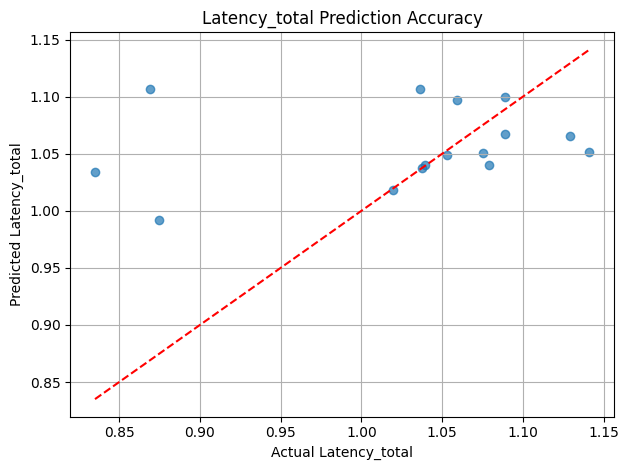

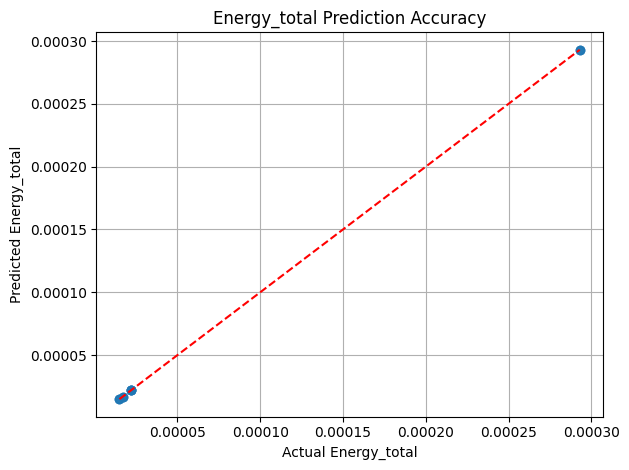

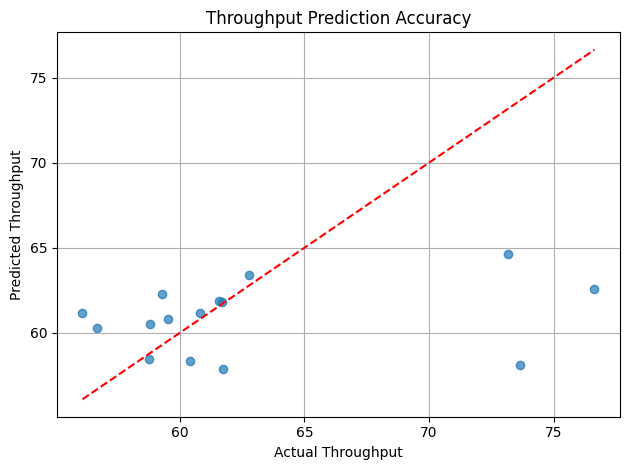


=== Prediction for example input ===
Latency: 1.1006
Energy: 2.200000e-05
Throughput: 58.84


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("summary_results_densenet40.csv")
df_encoded = pd.get_dummies(df, columns=["Dataflow"], drop_first=True)

# Manual feature engineering
df_encoded["OpsPerSubarray"] = df_encoded["Subarray"] * df_encoded["MemCell"]
df_encoded["InverseTechNode"] = 1.0 / df_encoded["TechNode"]

# Select features and targets
X = df_encoded[["TechNode", "Subarray", "MemCell", "OpsPerSubarray", "InverseTechNode"] +
               [col for col in df_encoded.columns if col.startswith("Dataflow_")]]
Y = df_encoded[["Latency_total", "Energy_total", "Throughput"]]

# Consistent train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train multi-output regression model
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, Y_train)

# Evaluate
Y_pred = model.predict(X_test)
print("=== Evaluation ===")
for i, col in enumerate(Y.columns):
    r2 = r2_score(Y_test[col], Y_pred[:, i])
    mae = mean_absolute_error(Y_test[col], Y_pred[:, i])
    print(f"{col} R2: {r2:.4f}, MAE: {mae:.4f}")

# Visualize predictions
for i, col in enumerate(Y.columns):
    plt.figure()
    plt.scatter(Y_test[col], Y_pred[:, i], alpha=0.7)
    plt.plot([Y_test[col].min(), Y_test[col].max()],
             [Y_test[col].min(), Y_test[col].max()], 'r--')
    plt.xlabel(f"Actual {col}")
    plt.ylabel(f"Predicted {col}")
    plt.title(f"{col} Prediction Accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{col}_prediction_plot.png")
    plt.show()
    plt.close()

# Predict for a new example input
example_input = pd.DataFrame([[22, 128, 2, 256, 1/22, 0, 1, 0]], columns=X.columns)
predicted = model.predict(example_input)[0]
print("\n=== Prediction for example input ===")
print(f"Latency: {predicted[0]:.4f}")
print(f"Energy: {predicted[1]:.6e}")
print(f"Throughput: {predicted[2]:.2f}")


KNN + Ridge


=== KNN Regressor ===
Latency_total R2: 0.1056, MAE: 0.0672
Energy_total R2: -0.3418, MAE: 0.0001
Throughput R2: 0.1281, MAE: 4.2593

=== Ridge Regression ===
Latency_total R2: -0.0772, MAE: 0.0630
Energy_total R2: 0.9488, MAE: 0.0000
Throughput R2: -0.0432, MAE: 4.1165


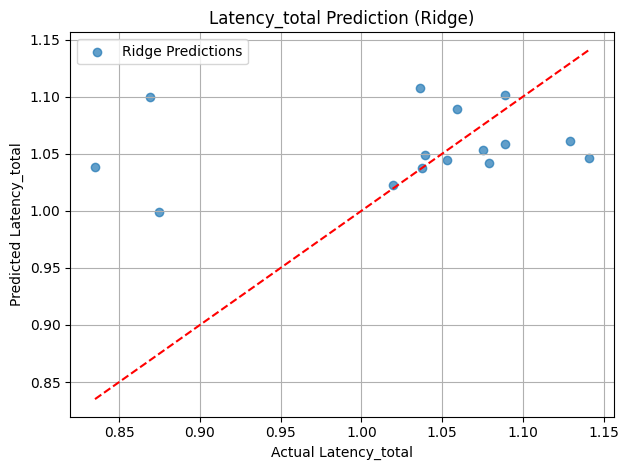

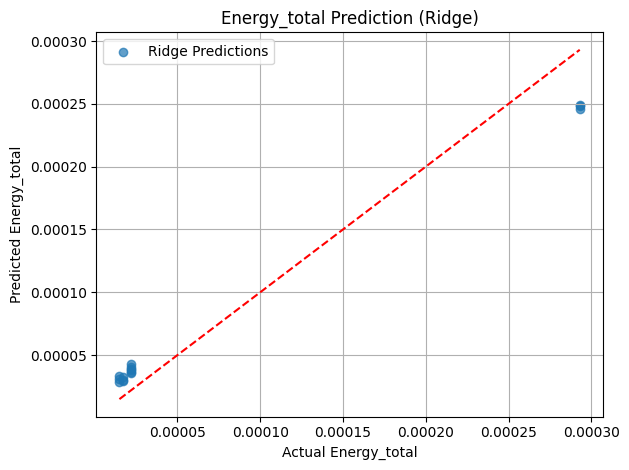

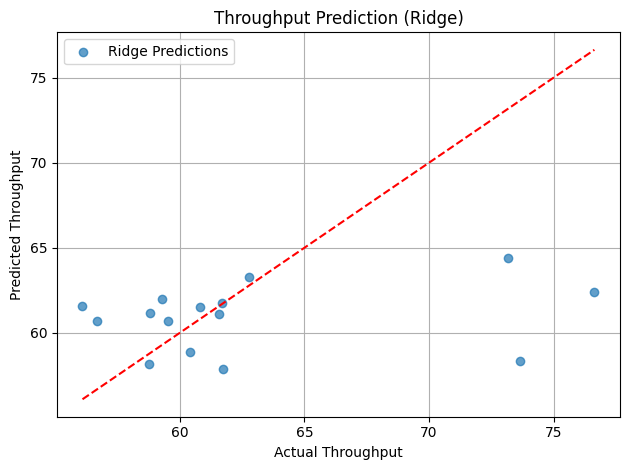

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load and encode data
df = pd.read_csv("summary_results_densenet40.csv")
df_encoded = pd.get_dummies(df, columns=["Dataflow"], drop_first=True)

# Manual feature engineering
df_encoded["OpsPerSubarray"] = df_encoded["Subarray"] * df_encoded["MemCell"]
df_encoded["InverseTechNode"] = 1.0 / df_encoded["TechNode"]

# Feature set and targets
X = df_encoded[["TechNode", "Subarray", "MemCell", "OpsPerSubarray", "InverseTechNode"] +
               [col for col in df_encoded.columns if col.startswith("Dataflow_")]]
Y = df_encoded[["Latency_total", "Energy_total", "Throughput"]]

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ===========================
# K-Nearest Neighbors Model
# ===========================
print("=== KNN Regressor ===")
knn_model = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=3))
knn_model.fit(X_train, Y_train)
Y_knn_pred = knn_model.predict(X_test)

for i, col in enumerate(Y.columns):
    r2 = r2_score(Y_test[col], Y_knn_pred[:, i])
    mae = mean_absolute_error(Y_test[col], Y_knn_pred[:, i])
    print(f"{col} R2: {r2:.4f}, MAE: {mae:.4f}")

# ===========================
# Ridge Regression Model
# ===========================
print("\n=== Ridge Regression ===")
ridge_model = MultiOutputRegressor(Ridge(alpha=1.0))
ridge_model.fit(X_train, Y_train)
Y_ridge_pred = ridge_model.predict(X_test)

for i, col in enumerate(Y.columns):
    r2 = r2_score(Y_test[col], Y_ridge_pred[:, i])
    mae = mean_absolute_error(Y_test[col], Y_ridge_pred[:, i])
    print(f"{col} R2: {r2:.4f}, MAE: {mae:.4f}")

# ===========================
# Optional: Visualization for Ridge
# ===========================
for i, col in enumerate(Y.columns):
    plt.figure()
    plt.scatter(Y_test[col], Y_ridge_pred[:, i], alpha=0.7, label='Ridge Predictions')
    plt.plot([Y_test[col].min(), Y_test[col].max()],
             [Y_test[col].min(), Y_test[col].max()], 'r--')
    plt.xlabel(f"Actual {col}")
    plt.ylabel(f"Predicted {col}")
    plt.title(f"{col} Prediction (Ridge)")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.savefig(f"{col}_ridge_plot.png")
    plt.show()
    plt.close()


SVR

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("summary_results_densenet40.csv")
df_encoded = pd.get_dummies(df, columns=["Dataflow"], drop_first=True)
df_encoded["OpsPerSubarray"] = df_encoded["Subarray"] * df_encoded["MemCell"]
df_encoded["InverseTechNode"] = 1.0 / df_encoded["TechNode"]

X = df_encoded[["TechNode", "Subarray", "MemCell", "OpsPerSubarray", "InverseTechNode"] +
               [c for c in df_encoded.columns if c.startswith("Dataflow_")]]
Y = df_encoded[["Latency_total", "Energy_total", "Throughput"]]

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# SVR model (use same kernel and settings for each target)
svr = MultiOutputRegressor(SVR(kernel="rbf", C=10, epsilon=0.01))
svr.fit(X_train, Y_train)
Y_pred = svr.predict(X_test)

# Evaluation
print("=== SVR Evaluation ===")
for i, col in enumerate(Y.columns):
    r2 = r2_score(Y_test[col], Y_pred[:, i])
    mae = mean_absolute_error(Y_test[col], Y_pred[:, i])
    print(f"{col} R2: {r2:.4f}, MAE: {mae:.4f}")


=== SVR Evaluation ===
Latency_total R2: 0.2250, MAE: 0.0598
Energy_total R2: -0.5351, MAE: 0.0001
Throughput R2: -0.0208, MAE: 4.0550


GRADIENTBOOSTER model

=== Summary-Wise Hybrid Model Evaluation ===
Latency_total R2: 0.2227, MAE: 0.0687
Energy_total R2: 1.0000, MAE: 0.0000
Throughput R2: 0.4232, MAE: 3.6805


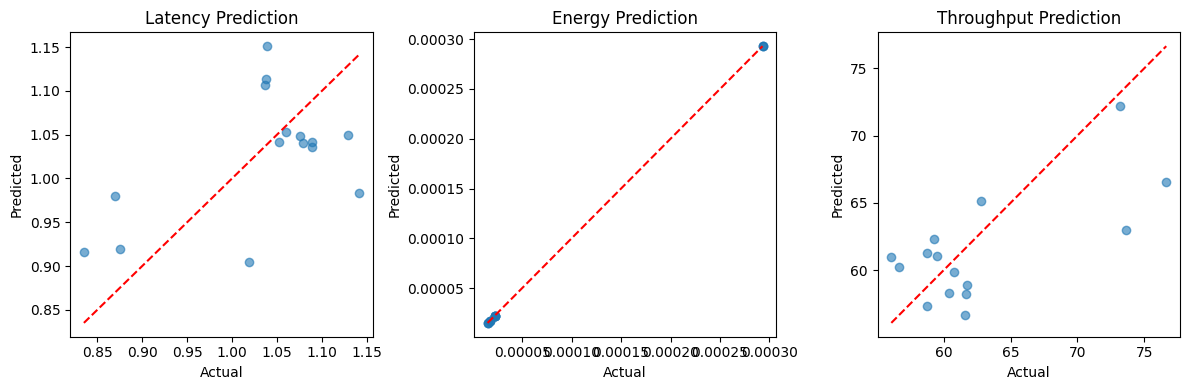


=== Layer-Wise Model Evaluation (Updated Features) ===
Latency R2: 0.7960, MAE: 0.000002
Energy  R2: 1.0000, MAE: 0.000000


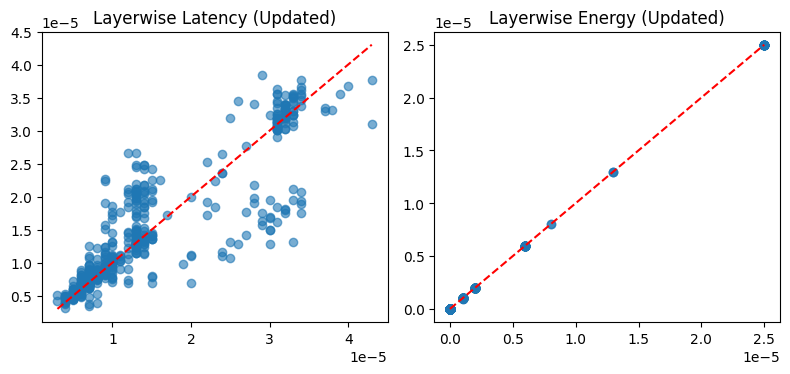

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# === Load summary-wise data ===
df_summary = pd.read_csv("summary_results_densenet40.csv")

# One-hot encode Dataflow
df_summary = pd.get_dummies(df_summary, columns=["Dataflow"], drop_first=True)

# Feature engineering
df_summary["OpsPerSubarray"] = df_summary["Subarray"] * df_summary["MemCell"]
df_summary["InverseTechNode"] = 1.0 / df_summary["TechNode"]
df_summary["TotalCapacity"] = df_summary["Subarray"] * df_summary["MemCell"] * df_summary["TechNode"]
df_summary["LogOpsPerSubarray"] = np.log1p(df_summary["OpsPerSubarray"])
df_summary["Subarray_TechRatio"] = df_summary["Subarray"] * df_summary["InverseTechNode"]

# Feature selection
X_summary = df_summary[
    ["TechNode", "Subarray", "MemCell", "OpsPerSubarray", "InverseTechNode",
     "TotalCapacity", "LogOpsPerSubarray", "Subarray_TechRatio"] +
    [c for c in df_summary.columns if c.startswith("Dataflow_")]
]
Y_summary = df_summary[["Latency_total", "Energy_total", "Throughput"]]

# Train/test split
X_sum_train, X_sum_test, y_sum_train, y_sum_test = train_test_split(
    X_summary, Y_summary, test_size=0.2, random_state=42
)

# Define Gradient Boosting models for all targets
model_latency = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
model_energy = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
model_throughput = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# Fit models
model_latency.fit(X_sum_train, y_sum_train["Latency_total"])
model_energy.fit(X_sum_train, y_sum_train["Energy_total"])
model_throughput.fit(X_sum_train, y_sum_train["Throughput"])

# Predict
latency_pred = model_latency.predict(X_sum_test)
energy_pred = model_energy.predict(X_sum_test)
throughput_pred = model_throughput.predict(X_sum_test)

print("=== Summary-Wise Hybrid Model Evaluation ===")
for label, y_true, y_pred in zip(["Latency_total", "Energy_total", "Throughput"],
                                 [y_sum_test["Latency_total"], y_sum_test["Energy_total"], y_sum_test["Throughput"]],
                                 [latency_pred, energy_pred, throughput_pred]):
    print(f"{label} R2: {r2_score(y_true, y_pred):.4f}, MAE: {mean_absolute_error(y_true, y_pred):.4f}")

# === Plot predictions ===
plt.figure(figsize=(12, 4))
for i, (y_true, y_pred, label) in enumerate(zip(
    [y_sum_test["Latency_total"], y_sum_test["Energy_total"], y_sum_test["Throughput"]],
    [latency_pred, energy_pred, throughput_pred],
    ["Latency", "Energy", "Throughput"]
)):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction")

# Save the plots to files
plt.tight_layout()

# Save each plot as an individual file
plt.subplot(1, 3, 1)
plt.savefig("latency_prediction.png")  # Save Latency plot

plt.subplot(1, 3, 2)
plt.savefig("energy_prediction.png")  # Save Energy plot

plt.subplot(1, 3, 3)
plt.savefig("throughput_prediction.png")  # Save Throughput plot

# Display the plots
plt.show()

# === Predict for example input ===
#example_input = pd.DataFrame([[22, 128, 2, 256, 1/22, 0, 1, 0]], columns=X_summary.columns)
#print("\n=== Prediction for Example Summary Input ===")
#print(f"Latency: {model_latency.predict(example_input)[0]:.4f}")
#print(f"Energy: {model_energy.predict(example_input)[0]:.6e}")
#print(f"Throughput: {model_throughput.predict(example_input)[0]:.2f}")

# ====================================================================================

# === Load layer-wise data (already has headers) ===
# === Load layer-wise data (already has headers) ===
df_layerwise = pd.read_csv("layerwise_results_densenet40.csv")

# Preprocess layerwise
df_layerwise = pd.get_dummies(df_layerwise, columns=["Dataflow"], drop_first=True)
df_layerwise["OpsPerSubarray"] = df_layerwise["Subarray"] * df_layerwise["MemCell"]
df_layerwise["InverseTechNode"] = 1.0 / df_layerwise["TechNode"]

# Cast scientific notation columns to float if needed
for col in ["Latency", "Energy", "Operations", "Mem_Reads", "Mem_Writes",
            "L1_Accesses", "L2_Accesses", "DRAM_Accesses"]:
    df_layerwise[col] = pd.to_numeric(df_layerwise[col], errors='coerce')

# Select feature columns
X_layer = df_layerwise[[
    "TechNode", "Subarray", "MemCell", "OpsPerSubarray", "InverseTechNode",
    "Operations", "Mem_Reads", "Mem_Writes", "L1_Accesses", "L2_Accesses", "DRAM_Accesses"
] + [c for c in df_layerwise.columns if c.startswith("Dataflow_")]]

# Target columns
Y_layer = df_layerwise[["Latency", "Energy"]]

# Train-test split
X_lay_train, X_lay_test, y_lay_train, y_lay_test = train_test_split(X_layer, Y_layer, test_size=0.2, random_state=42)

# Train models

model_layer_latency = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    min_samples_split=4,
    min_samples_leaf=3,
    subsample=0.8,
    random_state=42
)

model_layer_energy = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    min_samples_split=4,
    min_samples_leaf=3,
    subsample=0.8,
    random_state=42
)



model_layer_latency.fit(X_lay_train, y_lay_train["Latency"])
model_layer_energy.fit(X_lay_train, y_lay_train["Energy"])

# Predictions
lat_pred = model_layer_latency.predict(X_lay_test)
eng_pred = model_layer_energy.predict(X_lay_test)

# Evaluation
print("\n=== Layer-Wise Model Evaluation (Updated Features) ===")
print(f"Latency R2: {r2_score(y_lay_test['Latency'], lat_pred):.4f}, MAE: {mean_absolute_error(y_lay_test['Latency'], lat_pred):.6f}")
print(f"Energy  R2: {r2_score(y_lay_test['Energy'], eng_pred):.4f}, MAE: {mean_absolute_error(y_lay_test['Energy'], eng_pred):.6f}")

# Plot results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_lay_test["Latency"], lat_pred, alpha=0.6)
plt.plot([y_lay_test["Latency"].min(), y_lay_test["Latency"].max()],
         [y_lay_test["Latency"].min(), y_lay_test["Latency"].max()], 'r--')
plt.title("Layerwise Latency (Updated)")
plt.savefig("layerwise_latency.png")


plt.subplot(1, 2, 2)
plt.scatter(y_lay_test["Energy"], eng_pred, alpha=0.6)
plt.plot([y_lay_test["Energy"].min(), y_lay_test["Energy"].max()],
         [y_lay_test["Energy"].min(), y_lay_test["Energy"].max()], 'r--')
plt.title("Layerwise Energy (Updated)")
plt.savefig("layerwise_energy.png")
plt.tight_layout()
plt.show()


Hybrid + mathematical

=== Summary-Wise Hybrid Model Evaluation ===
Latency_total R2: 0.2227, MAE: 0.0687
Energy_total R2: 1.0000, MAE: 0.0000
Throughput R2: 0.4232, MAE: 3.6805


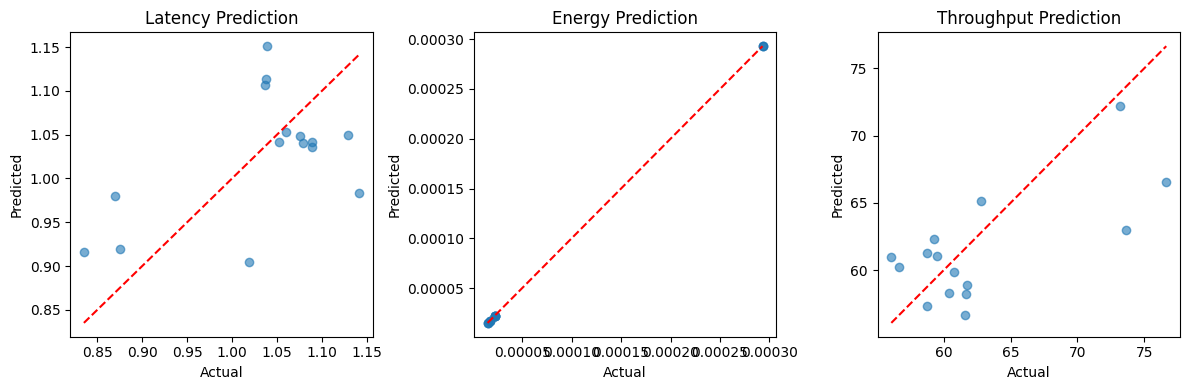

KeyError: "['Ops/Subarray'] not in index"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# === Load summary-wise data ===
df_summary = pd.read_csv("summary_results_densenet40.csv")

# One-hot encode Dataflow
df_summary = pd.get_dummies(df_summary, columns=["Dataflow"], drop_first=True)

# Feature engineering for summary data
df_summary["OpsPerSubarray"] = df_summary["Subarray"] * df_summary["MemCell"]
df_summary["InverseTechNode"] = 1.0 / df_summary["TechNode"]
df_summary["TotalCapacity"] = df_summary["Subarray"] * df_summary["MemCell"] * df_summary["TechNode"]
df_summary["LogOpsPerSubarray"] = np.log1p(df_summary["OpsPerSubarray"])
df_summary["Subarray_TechRatio"] = df_summary["Subarray"] * df_summary["InverseTechNode"]

# Feature selection for summary data
X_summary = df_summary[
    ["TechNode", "Subarray", "MemCell", "OpsPerSubarray", "InverseTechNode",
     "TotalCapacity", "LogOpsPerSubarray", "Subarray_TechRatio"] +
    [c for c in df_summary.columns if c.startswith("Dataflow_")]
]
Y_summary = df_summary[["Latency_total", "Energy_total", "Throughput"]]

# Train/test split for summary data
X_sum_train, X_sum_test, y_sum_train, y_sum_test = train_test_split(
    X_summary, Y_summary, test_size=0.2, random_state=42
)

# Define Gradient Boosting models for all targets in summary data
model_latency = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
model_energy = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
model_throughput = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# Fit models for summary data
model_latency.fit(X_sum_train, y_sum_train["Latency_total"])
model_energy.fit(X_sum_train, y_sum_train["Energy_total"])
model_throughput.fit(X_sum_train, y_sum_train["Throughput"])

# Predict for summary data
latency_pred = model_latency.predict(X_sum_test)
energy_pred = model_energy.predict(X_sum_test)
throughput_pred = model_throughput.predict(X_sum_test)

# Summary evaluation
print("=== Summary-Wise Hybrid Model Evaluation ===")
for label, y_true, y_pred in zip(["Latency_total", "Energy_total", "Throughput"],
                                 [y_sum_test["Latency_total"], y_sum_test["Energy_total"], y_sum_test["Throughput"]],
                                 [latency_pred, energy_pred, throughput_pred]):
    print(f"{label} R2: {r2_score(y_true, y_pred):.4f}, MAE: {mean_absolute_error(y_true, y_pred):.4f}")

# Plot summary predictions
plt.figure(figsize=(12, 4))
for i, (y_true, y_pred, label) in enumerate(zip(
    [y_sum_test["Latency_total"], y_sum_test["Energy_total"], y_sum_test["Throughput"]],
    [latency_pred, energy_pred, throughput_pred],
    ["Latency", "Energy", "Throughput"]
)):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction")
plt.tight_layout()
plt.show()

# === Load layer-wise data ===
df_layerwise = pd.read_csv("layerwise_results_densenet40.csv")

# Preprocess layerwise data
df_layerwise = pd.get_dummies(df_layerwise, columns=["Dataflow"], drop_first=True)
df_layerwise["OpsPerSubarray"] = df_layerwise["Subarray"] * df_layerwise["MemCell"]
df_layerwise["InverseTechNode"] = 1.0 / df_layerwise["TechNode"]

# Cast scientific notation columns to float if needed
for col in ["Latency", "Energy", "Operations", "Mem_Reads", "Mem_Writes",
            "L1_Accesses", "L2_Accesses", "DRAM_Accesses"]:
    df_layerwise[col] = pd.to_numeric(df_layerwise[col], errors='coerce')

# Select feature columns for layerwise data
X_layer = df_layerwise[[
    "TechNode", "Subarray", "MemCell", "OpsPerSubarray", "InverseTechNode",
    "Operations", "Mem_Reads", "Mem_Writes", "L1_Accesses", "L2_Accesses", "DRAM_Accesses"
] + [c for c in df_layerwise.columns if c.startswith("Dataflow_")]]

# Target columns for layerwise data
Y_layer = df_layerwise[["Latency", "Energy"]]

# Train-test split for layerwise data
X_lay_train, X_lay_test, y_lay_train, y_lay_test = train_test_split(X_layer, Y_layer, test_size=0.2, random_state=42)

# Define models for layerwise data
model_layer_latency = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
model_layer_energy = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)

# Fit models for layerwise data
model_layer_latency.fit(X_lay_train, y_lay_train["Latency"])
model_layer_energy.fit(X_lay_train, y_lay_train["Energy"])

# Predict for layerwise data
# Machine learning model predictions (Gradient Boosting)
lat_pred_ml = model_layer_latency.predict(X_lay_test)
eng_pred_ml = model_layer_energy.predict(X_lay_test)

# Mathematical model predictions (Linear regression from your model)
X_latency_math = X_lay_test[["Ops/Subarray", "DRAM_Accesses"]]
lat_pred_math = latency_model.predict(X_latency_math)
eng_pred_math = energy_model.predict(X_lay_test)

# Layerwise evaluation
# Stack predictions into a new feature set (using both machine learning and mathematical predictions)
X_stack = np.column_stack([lat_pred_ml, lat_pred_math])  # Stack both Latency predictions

# Create a second-level model (e.g., Linear Regression) for stacking
stacking_model_latency = LinearRegression()

# Fit the stacking model using the actual target values (true Latency values)
stacking_model_latency.fit(X_stack, y_lay_test["Latency"])

# Predict using the stacking model
latency_final_pred_stack = stacking_model_latency.predict(X_stack)

# Now, stack predictions for Energy
X_stack_energy = np.column_stack([eng_pred_ml, eng_pred_math])  # Stack both Energy predictions

# Create a second-level model (e.g., Linear Regression) for stacking
stacking_model_energy = LinearRegression()

# Fit the stacking model using the actual target values (true Energy values)
stacking_model_energy.fit(X_stack_energy, y_lay_test["Energy"])

# Predict using the stacking model for Energy
energy_final_pred_stack = stacking_model_energy.predict(X_stack_energy)

# -------------------------
# Evaluate the final hybrid model (Stacking)
# -------------------------
print("\n=== Hybrid Model Evaluation (Stacking) ===")
# Latency evaluation
print(f"Latency R2: {r2_score(y_lay_test['Latency'], latency_final_pred_stack):.4f}")
print(f"Latency MAE: {mean_absolute_error(y_lay_test['Latency'], latency_final_pred_stack):.6f}")

# Energy evaluation
print(f"Energy  R2: {r2_score(y_lay_test['Energy'], energy_final_pred_stack):.4f}")
print(f"Energy  MAE: {mean_absolute_error(y_lay_test['Energy'], energy_final_pred_stack):.6f}")


# Plot layerwise results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_lay_test["Latency"], lat_pred, alpha=0.6)
plt.plot([y_lay_test["Latency"].min(), y_lay_test["Latency"].max()],
         [y_lay_test["Latency"].min(), y_lay_test["Latency"].max()], 'r--')
plt.title("Layerwise Latency")

plt.subplot(1, 2, 2)
plt.scatter(y_lay_test["Energy"], eng_pred, alpha=0.6)
plt.plot([y_lay_test["Energy"].min(), y_lay_test["Energy"].max()],
         [y_lay_test["Energy"].min(), y_lay_test["Energy"].max()], 'r--')
plt.title("Layerwise Energy")
plt.tight_layout()
plt.show()

# ===========================
# Hybrid Model: Latency and Energy (Analytical)
# ===========================

# === Latency Analytical Model ===
X_latency = df_layerwise[["Operations", "Subarray", "DRAM_Accesses"]].copy()
X_latency["Ops/Subarray"] = X_latency["Operations"] / X_latency["Subarray"]
X_latency = X_latency[["Ops/Subarray", "DRAM_Accesses"]]
y_latency = df_layerwise["Latency"]

latency_model = LinearRegression().fit(X_latency, y_latency)

print("\n=== Latency Analytical Model ===")
print("Latency = α * (Operations / Subarray) + β * DRAM_Accesses + γ")
print(f"α = {latency_model.coef_[0]:.6e}")
print(f"β = {latency_model.coef_[1]:.6e}")
print(f"γ = {latency_model.intercept_:.6e}")

# === Energy Analytical Model ===
X_energy = df_layerwise[["DRAM_Accesses", "ADC_to_GB", "Operations"]]
y_energy = df_layerwise["Energy"]

energy_model = LinearRegression().fit(X_energy, y_energy)

print("\n=== Energy Analytical Model ===")
print("Energy = δ * DRAM_Accesses + ε * ADC_to_GB + ζ * Operations + η")
print(f"δ = {energy_model.coef_[0]:.6e}")
print(f"ε = {energy_model.coef_[1]:.6e}")
print(f"ζ = {energy_model.coef_[2]:.6e}")
print(f"η = {energy_model.intercept_:.6e}")


Polynomail and manual

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import joblib

# Load and encode data
df = pd.read_csv("/content/summary_results_densenet40.csv")
df_encoded = pd.get_dummies(df, columns=["Dataflow"], drop_first=True)

# === Option A: Polynomial (degree 2) + Ridge ===
X_poly = df_encoded[["TechNode", "Subarray", "MemCell"] + [c for c in df_encoded.columns if c.startswith("Dataflow_")]]
Y = df_encoded[["Latency_total", "Energy_total", "Throughput"]]

X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

poly_ridge_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), Ridge(alpha=1.0))
multi_model_poly_ridge = MultiOutputRegressor(poly_ridge_pipeline)
multi_model_poly_ridge.fit(X_train, Y_train)

joblib.dump(multi_model_poly_ridge, "model_poly_ridge.pkl")
joblib.dump(X_poly.columns.tolist(), "feature_columns_poly_ridge.pkl")

Y_pred = multi_model_poly_ridge.predict(X_test)
print("=== Polynomial + Ridge ===")
for i, col in enumerate(Y.columns):
    r2 = r2_score(Y_test[col], Y_pred[:, i])
    mae = mean_absolute_error(Y_test[col], Y_pred[:, i])
    print(f"{col} R2: {r2:.4f}, MAE: {mae:.4f}")

# === Option B: Manual feature engineering + Linear Regression ===
df_encoded["OpsPerSubarray"] = df_encoded["Subarray"] * df_encoded["MemCell"]
df_encoded["InverseTechNode"] = 1.0 / df_encoded["TechNode"]

X_manual = df_encoded[["TechNode", "Subarray", "MemCell", "OpsPerSubarray", "InverseTechNode"] + [c for c in df_encoded.columns if c.startswith("Dataflow_")]]
Y = df_encoded[["Latency_total", "Energy_total", "Throughput"]]

X_train, X_test, Y_train, Y_test = train_test_split(X_manual, Y, test_size=0.2, random_state=42)

linear_model_manual = MultiOutputRegressor(LinearRegression())
linear_model_manual.fit(X_train, Y_train)

joblib.dump(linear_model_manual, "model_manual_feats.pkl")
joblib.dump(X_manual.columns.tolist(), "feature_columns_manual_feats.pkl")

Y_pred_manual = linear_model_manual.predict(X_test)
print("\n=== Manual Features + Linear Regression ===")
for i, col in enumerate(Y.columns):
    r2 = r2_score(Y_test[col], Y_pred_manual[:, i])
    mae = mean_absolute_error(Y_test[col], Y_pred_manual[:, i])
    print(f"{col} R2: {r2:.4f}, MAE: {mae:.4f}")


=== Polynomial + Ridge ===
Latency_total R2: -0.2062, MAE: 0.0748
Energy_total R2: 0.9563, MAE: 0.0000
Throughput R2: -0.1098, MAE: 4.6364

=== Manual Features + Linear Regression ===
Latency_total R2: -0.0635, MAE: 0.0611
Energy_total R2: 1.0000, MAE: 0.0000
Throughput R2: -0.0300, MAE: 4.0305


hybrid for resnet



=== Summary-Wise Hybrid Model Evaluation (Poly + Stacked) ===
Latency_total  R2: -0.0469, MAE: 0.1463
Energy_total   R2: 0.9579, MAE: 0.0000
Throughput     R2: -0.0434, MAE: 0.2960


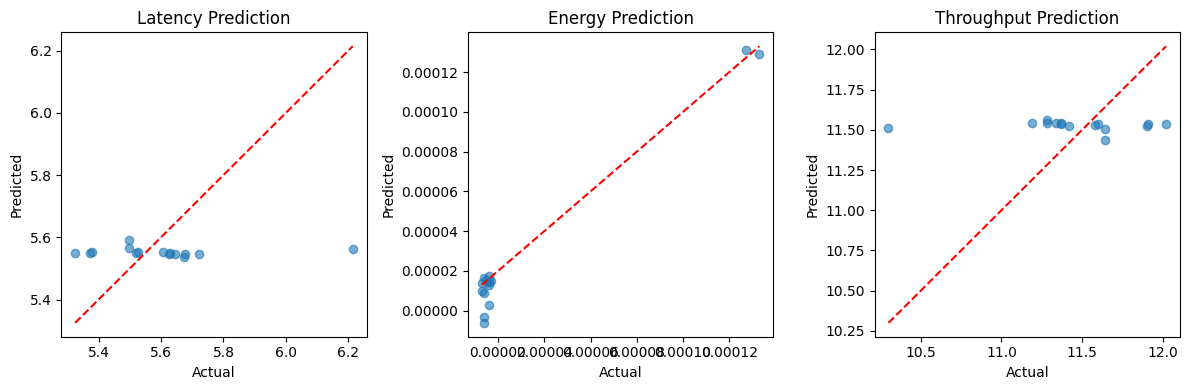


=== Layer-Wise Model Evaluation (Stacked + Log Transform) ===
Latency R2: 0.8700, MAE: 0.000001
Energy  R2: 0.8555, MAE: 0.000001


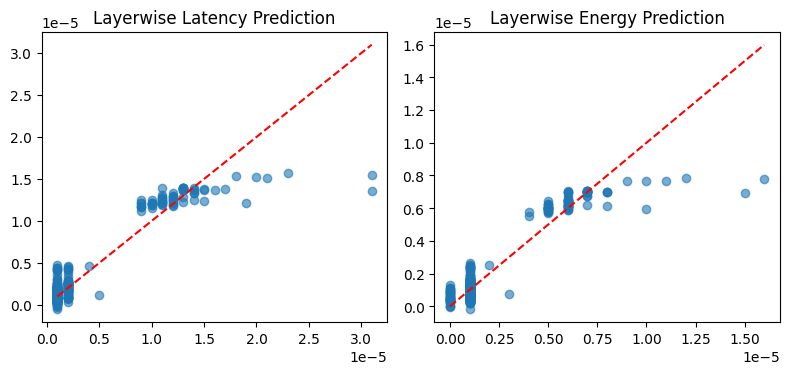

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# === Load summary-wise data ===
df_summary = pd.read_csv("summary_results_resnet18.csv")

# One-hot encode Dataflow
df_summary = pd.get_dummies(df_summary, columns=["Dataflow"], drop_first=True)



# Feature engineering
df_summary["OpsPerSubarray"] = df_summary["Subarray"] * df_summary["MemCell"]
df_summary["InverseTechNode"] = 1.0 / df_summary["TechNode"]
df_summary["TotalCapacity"] = df_summary["Subarray"] * df_summary["MemCell"] * df_summary["TechNode"]
df_summary["LogOpsPerSubarray"] = np.log1p(df_summary["OpsPerSubarray"])
df_summary["Subarray_TechRatio"] = df_summary["Subarray"] * df_summary["InverseTechNode"]

# Log transform target variables
df_summary["Log_Latency_total"] = np.log1p(df_summary["Latency_total"])
df_summary["Log_Throughput"] = np.log1p(df_summary["Throughput"])

# Feature selection
X_summary = df_summary[
    ["TechNode", "Subarray", "MemCell", "OpsPerSubarray", "InverseTechNode",
     "TotalCapacity", "LogOpsPerSubarray", "Subarray_TechRatio"] +
    [c for c in df_summary.columns if c.startswith("Dataflow_")]
]
Y_summary = df_summary[["Latency_total", "Energy_total", "Throughput", "Log_Latency_total", "Log_Throughput"]]

# Train/test split
X_sum_train, X_sum_test, y_sum_train, y_sum_test = train_test_split(
    X_summary, Y_summary, test_size=0.2, random_state=42
)

# Define base estimators
base_estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42))
]

# === Define Models ===
# Latency with PolyFeatures + Stacking
poly_latency_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StackingRegressor(
        estimators=base_estimators,
        final_estimator=Ridge()
    )
)

# Throughput with PolyFeatures + Stacking
poly_throughput_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StackingRegressor(
        estimators=base_estimators,
        final_estimator=Ridge()
    )
)

# Energy: Keep GB model (already good)
model_energy = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)

# === Train Models ===
poly_latency_model.fit(X_sum_train, y_sum_train["Log_Latency_total"])
model_energy.fit(X_sum_train, y_sum_train["Energy_total"])
poly_throughput_model.fit(X_sum_train, y_sum_train["Log_Throughput"])

# === Predict ===
latency_pred = np.expm1(poly_latency_model.predict(X_sum_test))
energy_pred = model_energy.predict(X_sum_test)
throughput_pred = np.expm1(poly_throughput_model.predict(X_sum_test))

# === Evaluation ===
print("\n=== Summary-Wise Hybrid Model Evaluation (Poly + Stacked) ===")
for label, y_true, y_pred in zip(
    ["Latency_total", "Energy_total", "Throughput"],
    [y_sum_test["Latency_total"], y_sum_test["Energy_total"], y_sum_test["Throughput"]],
    [latency_pred, energy_pred, throughput_pred]
):
    print(f"{label:<14} R2: {r2_score(y_true, y_pred):.4f}, MAE: {mean_absolute_error(y_true, y_pred):.4f}")

# === Plot predictions ===
plt.figure(figsize=(12, 4))
for i, (y_true, y_pred, label) in enumerate(zip(
    [y_sum_test["Latency_total"], y_sum_test["Energy_total"], y_sum_test["Throughput"]],
    [latency_pred, energy_pred, throughput_pred],
    ["Latency", "Energy", "Throughput"]
)):
    plt.subplot(1, 3, i + 1)
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction")
plt.tight_layout()
plt.show()



# === Layerwise part ===
df_layerwise = pd.read_csv("layerwise_results_resnet18.csv")
df_layerwise = pd.get_dummies(df_layerwise, columns=["Dataflow"], drop_first=True)
df_layerwise["OpsPerSubarray"] = df_layerwise["Subarray"] * df_layerwise["MemCell"]
df_layerwise["InverseTechNode"] = 1.0 / df_layerwise["TechNode"]

for col in ["Latency", "Energy", "Mem_Reads", "Mem_Writes", "L1_Accesses", "L2_Accesses", "DRAM_Accesses"]:
    df_layerwise[col] = pd.to_numeric(df_layerwise[col], errors='coerce')

X_layer = df_layerwise[[
    "TechNode", "Subarray", "MemCell", "BatchSize", "OpsPerSubarray", "InverseTechNode",
    "Mem_Reads", "Mem_Writes", "L1_Accesses", "L2_Accesses", "DRAM_Accesses",
    "PE_to_PE", "GB_to_PE", "DRAM_to_GB"] + [c for c in df_layerwise.columns if c.startswith("Dataflow_")]]
Y_layer = df_layerwise[["Latency", "Energy"]]

X_lay_train, X_lay_test, y_lay_train, y_lay_test = train_test_split(X_layer, Y_layer, test_size=0.2, random_state=42)

# === XGBoost and Stacking ===
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, subsample=0.8, random_state=42))
]

stacked_latency = StackingRegressor(estimators=base_models, final_estimator=Ridge(), passthrough=True)
stacked_energy = StackingRegressor(estimators=base_models, final_estimator=Ridge(), passthrough=True)

stacked_latency.fit(X_lay_train, np.log1p(y_lay_train["Latency"]))
stacked_energy.fit(X_lay_train, np.log1p(y_lay_train["Energy"]))

lat_pred_log = stacked_latency.predict(X_lay_test)
eng_pred_log = stacked_energy.predict(X_lay_test)

lat_pred = np.expm1(lat_pred_log)
eng_pred = np.expm1(eng_pred_log)

print("\n=== Layer-Wise Model Evaluation (Stacked + Log Transform) ===")
print(f"Latency R2: {r2_score(y_lay_test['Latency'], lat_pred):.4f}, MAE: {mean_absolute_error(y_lay_test['Latency'], lat_pred):.6f}")
print(f"Energy  R2: {r2_score(y_lay_test['Energy'], eng_pred):.4f}, MAE: {mean_absolute_error(y_lay_test['Energy'], eng_pred):.6f}")

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_lay_test["Latency"], lat_pred, alpha=0.6)
plt.plot([y_lay_test["Latency"].min(), y_lay_test["Latency"].max()],
         [y_lay_test["Latency"].min(), y_lay_test["Latency"].max()], 'r--')
plt.title("Layerwise Latency Prediction")

plt.subplot(1, 2, 2)
plt.scatter(y_lay_test["Energy"], eng_pred, alpha=0.6)
plt.plot([y_lay_test["Energy"].min(), y_lay_test["Energy"].max()],
         [y_lay_test["Energy"].min(), y_lay_test["Energy"].max()], 'r--')
plt.title("Layerwise Energy Prediction")
plt.tight_layout()
plt.show()


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.7 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.base import BaseEstimator, RegressorMixin
import xgboost as xgb

# Custom wrapper for Keras model to make it compatible with scikit-learn
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        # Fit the Keras model
        self.model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        # Make predictions with the Keras model
        return self.model.predict(X).flatten()

# Generate synthetic data (replace with your dataset)
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = X.sum(axis=1) + np.random.randn(1000)  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
def create_nn():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the Keras model using the custom KerasRegressorWrapper
keras_model = create_nn()
keras_regressor = KerasRegressorWrapper(keras_model)

# Define other base learners for stacking
base_learners = [
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)),
    ('nn', keras_regressor)
]

# Create and train the StackingRegressor
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=LinearRegression())
stacking_model.fit(X_train_scaled, y_train)

# Predict using the stacking model
y_pred_stack = stacking_model.predict(X_test_scaled)

# Evaluate the performance
print(f"Stacking Model R^2: {r2_score(y_test, y_pred_stack)}")


# === Layerwise part ===
df_layerwise = pd.read_csv("layerwise_results_resnet18.csv")
df_layerwise = pd.get_dummies(df_layerwise, columns=["Dataflow"], drop_first=True)
df_layerwise["OpsPerSubarray"] = df_layerwise["Subarray"] * df_layerwise["MemCell"]
df_layerwise["InverseTechNode"] = 1.0 / df_layerwise["TechNode"]

for col in ["Latency", "Energy", "Mem_Reads", "Mem_Writes", "L1_Accesses", "L2_Accesses", "DRAM_Accesses"]:
    df_layerwise[col] = pd.to_numeric(df_layerwise[col], errors='coerce')

X_layer = df_layerwise[[
    "TechNode", "Subarray", "MemCell", "BatchSize", "OpsPerSubarray", "InverseTechNode",
    "Mem_Reads", "Mem_Writes", "L1_Accesses", "L2_Accesses", "DRAM_Accesses",
    "PE_to_PE", "GB_to_PE", "DRAM_to_GB"] + [c for c in df_layerwise.columns if c.startswith("Dataflow_")]]
Y_layer = df_layerwise[["Latency", "Energy"]]

X_lay_train, X_lay_test, y_lay_train, y_lay_test = train_test_split(X_layer, Y_layer, test_size=0.2, random_state=42)

# === XGBoost and Stacking ===
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, subsample=0.8, random_state=42))
]

stacked_latency = StackingRegressor(estimators=base_models, final_estimator=Ridge(), passthrough=True)
stacked_energy = StackingRegressor(estimators=base_models, final_estimator=Ridge(), passthrough=True)

stacked_latency.fit(X_lay_train, np.log1p(y_lay_train["Latency"]))
stacked_energy.fit(X_lay_train, np.log1p(y_lay_train["Energy"]))

lat_pred_log = stacked_latency.predict(X_lay_test)
eng_pred_log = stacked_energy.predict(X_lay_test)

lat_pred = np.expm1(lat_pred_log)
eng_pred = np.expm1(eng_pred_log)

print("\n=== Layer-Wise Model Evaluation (Stacked + Log Transform) ===")
print(f"Latency R2: {r2_score(y_lay_test['Latency'], lat_pred):.4f}, MAE: {mean_absolute_error(y_lay_test['Latency'], lat_pred):.6f}")
print(f"Energy  R2: {r2_score(y_lay_test['Energy'], eng_pred):.4f}, MAE: {mean_absolute_error(y_lay_test['Energy'], eng_pred):.6f}")

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_lay_test["Latency"], lat_pred, alpha=0.6)
plt.plot([y_lay_test["Latency"].min(), y_lay_test["Latency"].max()],
         [y_lay_test["Latency"].min(), y_lay_test["Latency"].max()], 'r--')
plt.title("Layerwise Latency Prediction")

plt.subplot(1, 2, 2)
plt.scatter(y_lay_test["Energy"], eng_pred, alpha=0.6)
plt.plot([y_lay_test["Energy"].min(), y_lay_test["Energy"].max()],
         [y_lay_test["Energy"].min(), y_lay_test["Energy"].max()], 'r--')
plt.title("Layerwise Energy Prediction")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: The estimator KerasRegressorWrapper should be a regressor.

Features why?

=== Correlation with Latency ===
Latency             1.000000
Mem_Writes          0.725186
Operations          0.725186
Mem_Reads           0.641668
L1_Accesses         0.641668
L2_Accesses         0.641668
DRAM_Accesses       0.641668
Ops/Subarray        0.592069
OutputStationary    0.448075
PE_to_Output        0.409709
PE_to_Register      0.391066
Weight_to_PE        0.331970
Register_to_PE      0.319382
Dataflow_OS         0.111116
Dataflow_WS         0.064816
Dataflow_RS         0.038802
MemCell             0.005271
Subarray           -0.001537
TechNode           -0.002293
DRAM_to_Xbar       -0.069415
Xbar_to_ADC        -0.078752
ADC_to_GB          -0.078752
Name: Latency, dtype: float64

=== Standardized Coefficients ===
TechNode: -0.0000
Subarray: -0.0000
MemCell: 0.0000
Operations: 0.0000
Mem_Reads: -0.0639
Mem_Writes: 0.0000
L1_Accesses: -0.0639
L2_Accesses: -0.0639
DRAM_Accesses: 0.1918
DRAM_to_Xbar: -0.0000
Xbar_to_ADC: -0.0000
OutputStationary: 0.0000
PE_to_Output: 0.0000
We

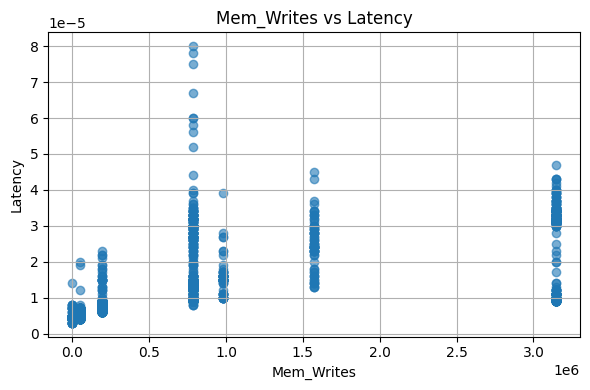

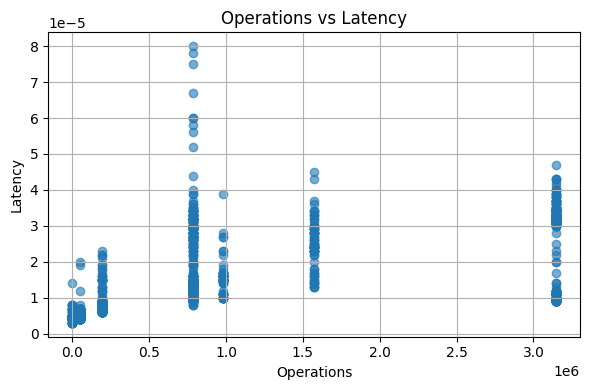


Model R^2 Score: 0.7177997955148543


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data (use the correct CSV for layerwise or summary)
df = pd.read_csv("layerwise_results_densenet40.csv")
df = df.dropna()  # Remove missing values

# Encode Dataflow if it's categorical
if df["Dataflow"].dtype == 'object':
    df = pd.get_dummies(df, columns=["Dataflow"], drop_first=True)

# Derived feature: Ops/Subarray
df["Ops/Subarray"] = df["Operations"] / df["Subarray"]

# Select all numeric features excluding identifiers and target
target = "Latency"
exclude_cols = ["Model", "Layer", "Energy", "Latency"]
features = [col for col in df.columns if col not in exclude_cols and df[col].dtype != 'object']
y = df[target]

# Correlation with target
print("=== Correlation with Latency ===")
print(df[features + [target]].corr()[target].sort_values(ascending=False))

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Linear Regression
model = LinearRegression()
model.fit(X_scaled, y)

# Coefficients
print("\n=== Standardized Coefficients ===")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.4f}")

# Plot top correlated features
top_feats = df[features + [target]].corr()[target].abs().sort_values(ascending=False).index[1:3]

for feat in top_feats:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feat], df[target], alpha=0.6)
    plt.xlabel(feat)
    plt.ylabel(target)
    plt.title(f"{feat} vs {target}")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{feat}_vs_{target}.png")
    plt.show()

# Print R^2
print("\nModel R^2 Score:", r2_score(y, model.predict(X_scaled)))

=== Correlation with Energy ===
Energy           1.000000e+00
ADC_to_GB        9.952166e-01
Operations       4.762238e-01
Ops/Subarray     3.901286e-01
DRAM_Accesses    3.506539e-01
Subarray        -3.635062e-17
Name: Energy, dtype: float64


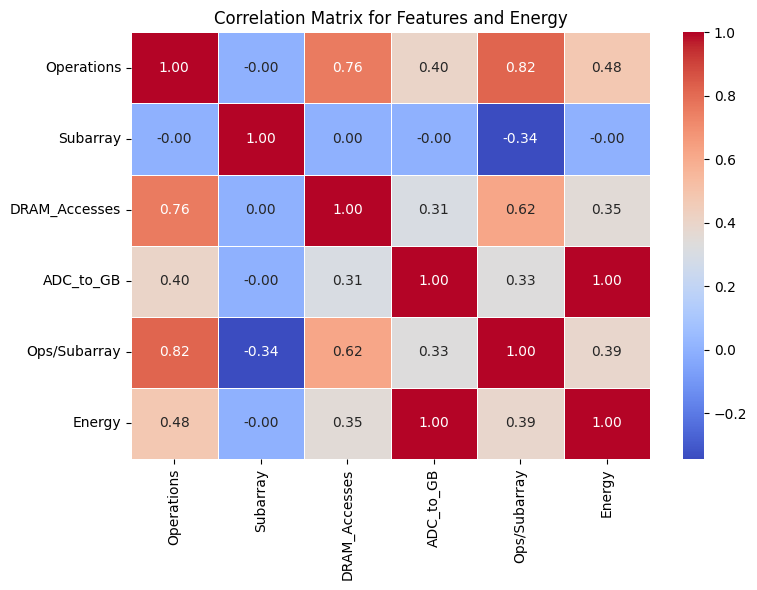

In [ ]:
import pandas as pd

# Load layerwise profiling data
df = pd.read_csv("layerwise_results_densenet40.csv")

# -------------------------
# Correlation Analysis for Energy Model
# -------------------------

# Select relevant columns
features = ["Operations", "Subarray", "DRAM_Accesses", "ADC_to_GB"]
target = "Energy"

# Derived feature: Ops/Subarray
df["Ops/Subarray"] = df["Operations"] / df["Subarray"]

# Calculate correlations
correlation = df[features + ["Ops/Subarray", target]].corr()

# Show correlation with Energy
print("=== Correlation with Energy ===")
print(correlation[target].sort_values(ascending=False))

# Optionally, plot correlation matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Features and Energy")
plt.tight_layout()
plt.show()
